In [54]:
using DataFrames,PythonPlot,StatsBase,Random,Distributions,CSV,DSP,NLsolve
PythonPlot.svg(true)
include("model.jl")
include("formulas.jl")
FIG_PATH = "/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/cell_cycle_growth"

"/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/cell_cycle_growth"

# Compare to alpha formula for 2d model

In [55]:
data= CSV.read("./output/sho_data_cells_2d.csv",DataFrame);
data
ω0range = data.ω0 |> unique |> sort;
ηrange = data.η |> unique |> sort;
qrange = data.q |> unique |> sort;

In [56]:
data = data[data.ω0 .< 10,:]
data = data[data.cell .> 50,:]
ω0range = data.ω0 |> unique |> sort;
ηrange = data.η |> unique |> sort;
qrange = data.q |> unique |> sort;

In [57]:
# dfu = data[data.q .== qrange[1],:]
# P = hcat([[d.isphys[1] for d in groupby(dfuet, :η)] for dfuet in groupby(dfu, :ω0)]...)
# fig, ax = subplots(1, 1, figsize=(6, 4))
# ax.plot(ω0range, P[6,:], marker="o", markersize=4, linewidth=1.5)
# fig

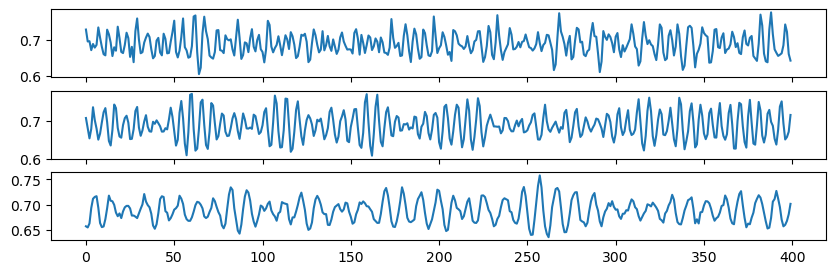

In [58]:

fig,ax = subplots(figsize=(10,3),nrows=3,sharex=true)

dfcell = data[(data.η .== ηrange[2]) .& (data.q .== qrange[1]) .&  (data.ω0 .== ω0range[6]), :]
ax[0].plot(dfcell.ϕ[1:400],"-")

dfcell = data[(data.η .== ηrange[1]) .& (data.q .== qrange[5]) .&  (data.ω0 .== ω0range[6]), :]
ax[1].plot(dfcell.ϕ[1:400],"-")

dfcell = data[(data.η .== ηrange[1]) .& (data.q .== qrange[end]) .&  (data.ω0 .== ω0range[4]), :]
ax[2].plot(dfcell.ϕ[1:400],"-")
fig

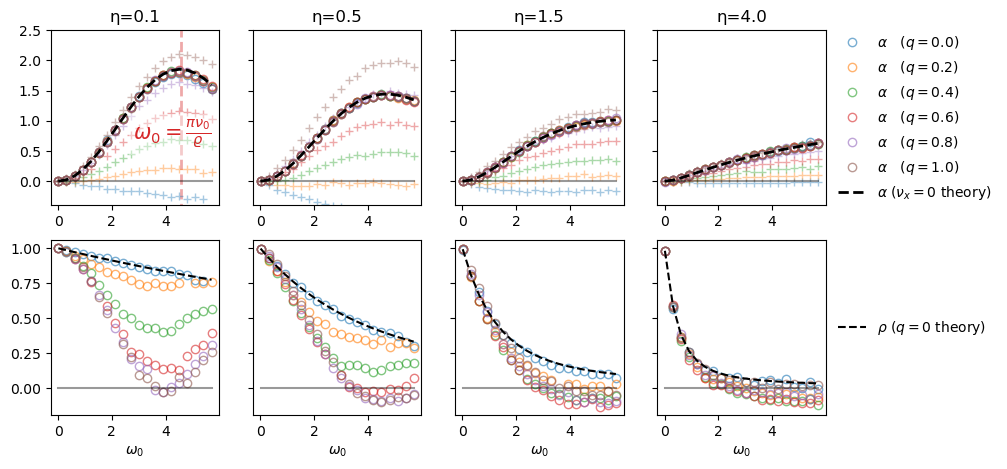

In [67]:
include("model.jl")
include("formulas.jl")

fig, axs = subplots(figsize=(10, 5), ncols=length(ηrange),nrows=2, sharey="row")

axs[0,0].vlines(π/log(2)/sqrt(abs.(1-ηrange[1]^2)), ymin=-2, ymax=5, colors="C3", linestyles="--", lw=2,alpha=0.4)
axs[0,0].text(π/log(2)/sqrt(abs.(1-ηrange[1]^2))-0.3, 0.5, L"$\omega_0 = \frac{\pi \nu_0}{\varrho}$", color="C3", ha="center", va="bottom",
fontsize=15, bbox=Dict("facecolor"=>"white", "edgecolor"=>"none", "pad"=>3,"alpha"=>0.4))
for i in 1:length(ηrange)
    ax = axs[0,i-1]
    


    η = ηrange[i]
    jj= 0
    for j in 1:2:length(qrange)
        dfcell = data[(data.η .== η) .& (data.q .== qrange[j]), :]
        dfcell = dfcell[dfcell.cell .< unique(dfcell.cell)[end]-1,:]
        alphas = [-cov(df.ϕ, df.z0) / var(df.z0) for df in groupby(dfcell, :ω0)]
        αλs = [-cov(d.ϕ ./ d.τ, d.z0) / var(d.z0) * mean(d.τ) for d in groupby(dfcell, :ω0)]
        ax.plot(ω0range,alphas, "C$(jj)o", label="\$\\alpha \\quad({q}=$(qrange[j]))\$",fillstyle="none",alpha=0.6)
        ax.plot(ω0range,αλs, "C$(jj)+",alpha=0.4,fillstyle="none")
        jj = jj+1
    end


    # ax.plot(ω0range_,Ws[:,i,1], "C0-",label= L"$W_{1}$")
    # for k in 2:5
    #     ω0 = ω0range_[k]
    #     ax.plot(ω0range_, Ws[:,i,k], "-",alpha=0.6,label= "\$W_{$(k)}\$")
    # end
    #ax.plot([0],[0],"C0-",alpha=0.3,label= L"$W_{i},i>1$")


    ax.plot(ω0range, [1-ksho(log(2),η/2, ω0range[i])/ksho(0.0, η/2, ω0range[i]) for i in 1:length(ω0range)], "k--",label=L"$\alpha$ ($\nu_x =0$ theory)",lw=2)
    
    #
    
    ax.set_title("η=$(η)")
    ax.set_ylim([-0.4,2.5])
    ax.plot(ω0range,zeros(length(ω0range)),"k-",alpha=0.4)

    ax = axs[1,i-1]
    for j in 1:2:length(qrange)
        q = qrange[j]
        df = data[(data.η .== η) .& (data.q .== q),:]
        ρs = [cor(d.λ[2:end], d.λ[1:end-1]) for d in groupby(df, :ω0)]
        ax.plot(ω0range, ρs,"o",alpha=0.6,fillstyle="none")
    end
    df = data[(data.η .== η) .& (data.q .== qrange[end]),:]
    ρs_theory = [rho_SHO(η, ω0, 1, 1) for ω0 in ω0range]
    ax.plot(ω0range, ρs_theory,"k--",label=L"$\rho$ ($q=0$ theory)")
    ax.plot(ω0range,zeros(length(ω0range)),"k-",alpha=0.4)
    ax.set_xlabel(L"$\omega_0$")
end

# make text over the line

# make the text have white background
axs[0,length(ηrange)-1].legend(frameon=false, loc="center left", bbox_to_anchor=(1, 0.5))
axs[1,length(ηrange)-1].legend(frameon=false, loc="center left", bbox_to_anchor=(1, 0.5))

savefig(joinpath(FIG_PATH, "fig7.pdf"), bbox_inches="tight", pad_inches=0.1, format="pdf")
fig

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


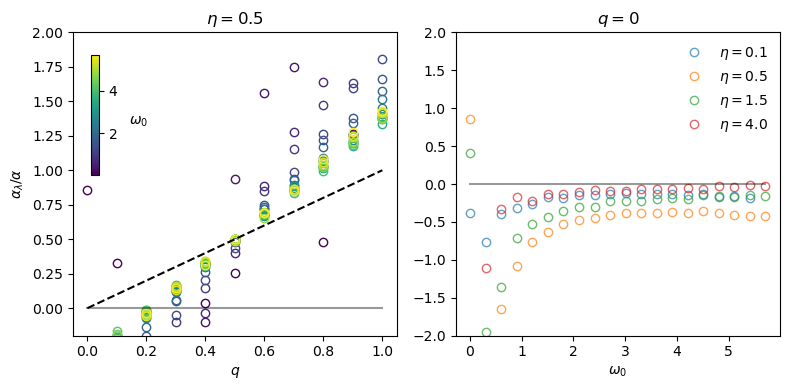

In [64]:
# Set up colormap for ω₀ values
ω0_selected = ω0range[1:1:end]
cmap = get_cmap("viridis")
norm_min, norm_max = minimum(ω0_selected), maximum(ω0_selected)

fig,axs = subplots(figsize=(8, 4),ncols=2)


ax = axs[0]

η =  ηrange[2]
ax.set_title("\$\\eta =$(η)\$")
for ω0 in ω0_selected
    df = data[(data.η .== η) .& (data.ω0 .== ω0), :]
    α = [-cov(d.ϕ, d.z0) / var(d.z0) for d in groupby(df, :q)]
    αλ = [-cov(d.ϕ ./ d.τ, d.z0) / var(d.z0) * mean(d.τ) for d in groupby(df, :q)]
    # Normalize ω0 value to [0,1] for colormap
    color_val = (ω0 - norm_min) / (norm_max - norm_min)
    color = cmap(color_val)
    ax.plot(qrange,αλ ./α,"o",color=color,fillstyle="none")
end
ax.set_ylim(-0.2,2)

ax.plot(qrange,zeros(length(qrange)),"k-",alpha=0.4)
ax.plot(qrange,qrange,"k--")
ax.set_ylabel(L"$\alpha_{\lambda}/\alpha$")

ax.set_xlabel(L"$q$")
norm = matplotlib.colors.Normalize(vmin=norm_min, vmax=norm_max)
sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar_ax = fig.add_axes([0.12, 0.55, 0.01, 0.3])
fig.colorbar(sm, cax=cbar_ax)
cbar_ax.set_ylabel(L"$\omega_0$", rotation=0, labelpad=15)

ax = axs[1]
ax.set_title("\$q =0\$")
for η in ηrange
    df = data[(data.η .== η) .& (data.q.== 0.0), :]
    α = [-cov(d.ϕ, d.z0) / var(d.z0) for d in groupby(df, :ω0)]
    αλ = [-cov(d.ϕ ./ d.τ, d.z0) / var(d.z0) * mean(d.τ) for d in groupby(df, :ω0)]
    ax.plot(ω0range,αλ ./α,"o",alpha=0.7,label="\$\\eta=$η\$",fillstyle="none")
end


ax.plot(ω0range,zeros(length(ω0range)),"k-",alpha=0.4)
ax.set_ylim(-2,2)
ax.legend(frameon=false)
ax.set_xlabel(L"$\omega_0$")


tight_layout()
savefig(joinpath(FIG_PATH, "fig8.pdf"), bbox_inches="tight", pad_inches=0.1, format="pdf")
fig

In [42]:

# Parameters
d = 5
ρx = randn(d)
fy = randn(d)
a = rand(d) .+ 1.0  # ensure a_i + μ ≠ 0 near μ=0

# Define function f(μ)
function f(μ::ComplexF64)
    sum = -μ
    for i in 1:d
        sum += ρx[i] * fy[i] / (a[i] + μ)
    end
    return sum
end

# Wrapper to use in NLsolve
function fvec!(F, x)
    μ = complex(x[1], x[2])
    y = f(μ)
    F[1] = real(y)
    F[2] = imag(y)
end


fvec! (generic function with 1 method)

# MISC

In [11]:
#

In [16]:
# simulates the model for a range of bθ and bz

using DataFrames,StatsBase,Random,Distributions,CSV
include("model.jl")
include("formulas.jl")


# Data containers

dt = 0.01
T = 500
init = [0.0, 0.0, 0.0, 0.0]
vz = 0.001
ν0 = 1/log(2)


η =  ηrange[1]
q = qrange[end]
ω0 = ω0range[4]

c = 1.
om =2.
η = 1.
q = 0.
a = om*η


σ = sqrt(vz*a*om^2) # variance of noise in z
params = build_model2d(a,a,om,q,σ,c)
df = make_sim_df(init, params, dt, T)

df.y = df.z .+ log(2) .* df.θ
dfcell_sim = combine(groupby(df, :cell),
        :z => (x -> x[1]) => :z0,
        :y => (x -> x[end] - x[1]) => :ϕ,
        :time => (x -> x[end] - x[1]) => :τ,
        :x1 => mean => :x1,
        :x2 => mean => :x2)
dfcell_sim.λ = dfcell_sim.ϕ ./dfcell_sim.τ
dfcell_sim.q .= q
df.q .= q
df.ω0 .= om
df.η .= η
dfcell_sim.ω0 .= om
dfcell_sim.η .= η
dfcell_sim.c .= c
dfcell_sim.isphys .=  isphysical(df);


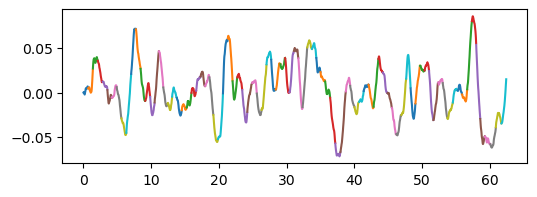

In [17]:
fig,ax = subplots(figsize=(6,2))
for cell in unique(df.cell)[1:90]
    dfcell = df[df.cell .== cell,:]
    ax.plot(dfcell.time,dfcell.z)
end

fig

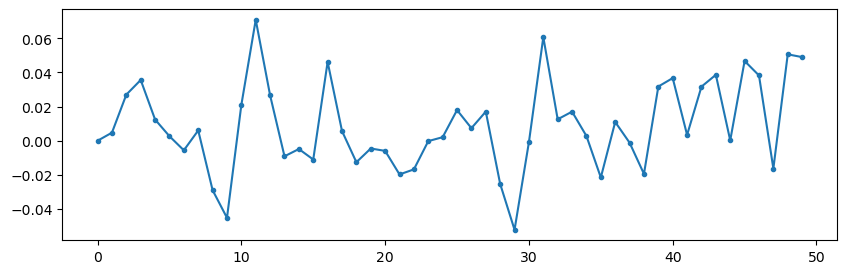

In [18]:
fig,ax = subplots(figsize=(10,3),sharex=true)
ax.plot(dfcell_sim.z0[1:50],".-")
fig

In [19]:
# covariance matrix of z0
dfcell_sim.z0

718-element Vector{Float64}:
  0.0
  0.00472881308375098
  0.02700423225341618
  0.035578294144361894
  0.01241645854543442
  0.002639301796374053
 -0.005600004150326814
  0.006030401143992206
 -0.02894628712066253
 -0.04514514844205847
  ⋮
 -0.019388864387590653
  0.0001145399435542266
  0.028694536570353694
 -0.0016757125126352608
 -0.0060846276621855195
  0.027862264051290487
  0.053829566777055936
  0.015432810815146693
  0.014154417068361489

In [276]:
cov(dfcell_sim.z0[1:end-1], dfcell_sim.z0[2:end])  /var(dfcell_sim.z0)

-0.0939940678892385

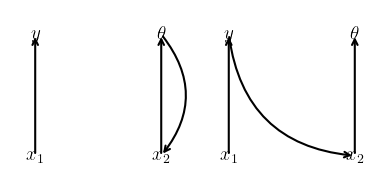

In [50]:
pyplot.rc("text", usetex=true)  # if you want LaTeX rendering

fig, axs = subplots(1, 2, figsize=(4, 2))

# positions of the four variables (square)
pos = Dict(
    :x1 => (0.0, 0.0),
    :x2 => (1.0, 0.0),
    :y  => (0.0, 1.0),
    :th => (1.0, 1.0),
)

function draw_base!(ax)
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    ax.axis("off")

    # place the labels
    ax.text(pos[:x1]..., L"$x_1$", ha="center", va="center", fontsize=14)
    ax.text(pos[:x2]..., L"$x_2$", ha="center", va="center", fontsize=14)
    ax.text(pos[:y]...,  L"$y$",   ha="center", va="center", fontsize=14)
    ax.text(pos[:th]..., L"$\theta$", ha="center", va="center", fontsize=14)

    # vertical arrows x1 -> y, x2 -> theta
    ax.annotate("",
        xy=pos[:y], xytext=pos[:x1],
        arrowprops=Dict("arrowstyle" => "->", "linewidth" => 1.5)
    )
    ax.annotate("",
        xy=pos[:th], xytext=pos[:x2],
        arrowprops=Dict("arrowstyle" => "->", "linewidth" => 1.5)
    )
end

# left panel: extra arrow θ → x₂ (curved)
draw_base!(axs[0])
axs[0].annotate("",
    xy=pos[:x2], xytext=pos[:th],
    arrowprops=Dict(
        "arrowstyle"      => "->",
        "linewidth"       => 1.5,
        "connectionstyle" => "arc3,rad=-0.4"  # controls curvature
    )
)

# right panel: extra arrow y → x₂ (curved)
draw_base!(axs[1])
axs[1].annotate("",
    xy=pos[:x2], xytext=pos[:y],
    arrowprops=Dict(
        "arrowstyle"      => "->",
        "linewidth"       => 1.5,
        "connectionstyle" => "arc3,rad=0.4"
    )
)

fig.tight_layout()
fig